In [2]:
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

In [3]:
file = "HFI_ScanBeam_143-5_R2.00.fits"

In [4]:

hdulist = fits.open(file)
primary_header = hdulist[0].header

hdr =  hdulist[0].header
list(hdr.keys()) 
data = hdulist[0].data
print(list(hdr.keys()) )

hdulist.close()
print(primary_header)

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'COMMENT', 'COMMENT', 'COMMENT', 'EXTNAME', 'BOLO', 'XCTR', 'YCTR', 'DELTAX', 'DELTAY', 'REF', 'FILENAME', 'PROCVER', 'COMMENT', 'COMMENT', 'COMMENT', 'COMMENT', 'COMMENT']
SIMPLE  =                    T / Written by IDL:  Wed Feb  4 20:12:43 2015      BITPIX  =                  -64 / Number of bits per data pixel                  NAXIS   =                    2 / Number of data axes                            NAXIS1  =                 6001 /                                                NAXIS2  =                 6001 /                                                COMMENT                                                                         COMMENT  *** Planck params ***                                                  COMMENT                                                                         EXTNAME = 'BEAM    '           / Beam, normalized                               BOLO    = '143-5   '           / Bolometer name          

In [5]:
beam = data

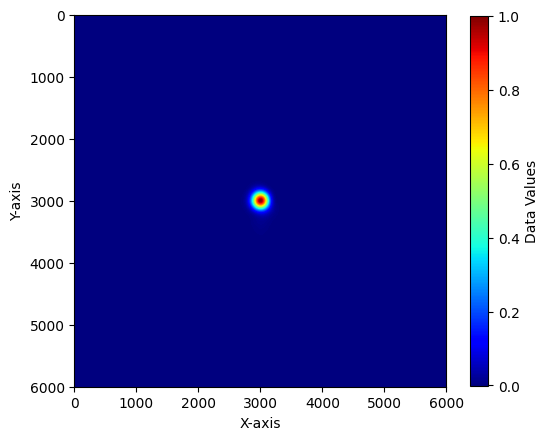

In [6]:
fig = plt.figure(figsize=(6, 6))  

plt.imshow(data, cmap='jet')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.colorbar(label='Data Values', shrink=0.8, location='right')

plt.show()

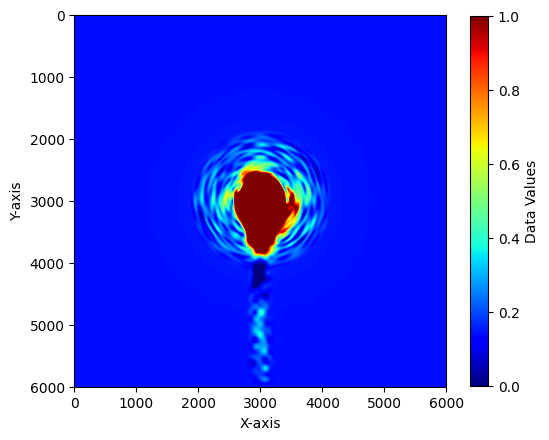

In [7]:
zscale = ZScaleInterval()



fig = plt.figure(figsize=(6, 6))

normalized_data = zscale(beam)

plt.imshow(normalized_data, cmap='jet')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')


plt.colorbar(label='Data Values', shrink=0.8, location='right')

plt.show()

In [8]:


max_index = np.argmax(beam)


row_index = max_index // beam.shape[1]
col_index = max_index % beam.shape[1]

print("Coordinates of maximum value:", (row_index, col_index))

Coordinates of maximum value: (3000, 3002)


In [9]:
# # in pixel coordinate
# x = np.linspace(-3000,3001,6001)
# y = np.linspace(-3000,3001,6001) 
# z = beam

# f = RegularGridInterpolator((y,x), z, method='linear')  
# xnew = np.linspace(-3000,3001,6001)
# ynew = np.linspace(-3000,3001,6001)
# xx, yy = np.meshgrid(xnew, ynew)
# znew = f((yy,xx))

In [10]:
# in arc min
x = (2/60)*np.linspace(-3000,3001,6001)
y = (2/60)*np.linspace(-3000,3001,6001) 
z = beam

f = RegularGridInterpolator((y,x), z, method='linear')  
xnew = (2/60)*np.linspace(-3000,3001,6001)
ynew = (2/60)*np.linspace(-3000,3001,6001)
xx, yy = np.meshgrid(xnew, ynew)
znew = f((yy,xx))

In [11]:
np.savetxt("grid.txt",znew)

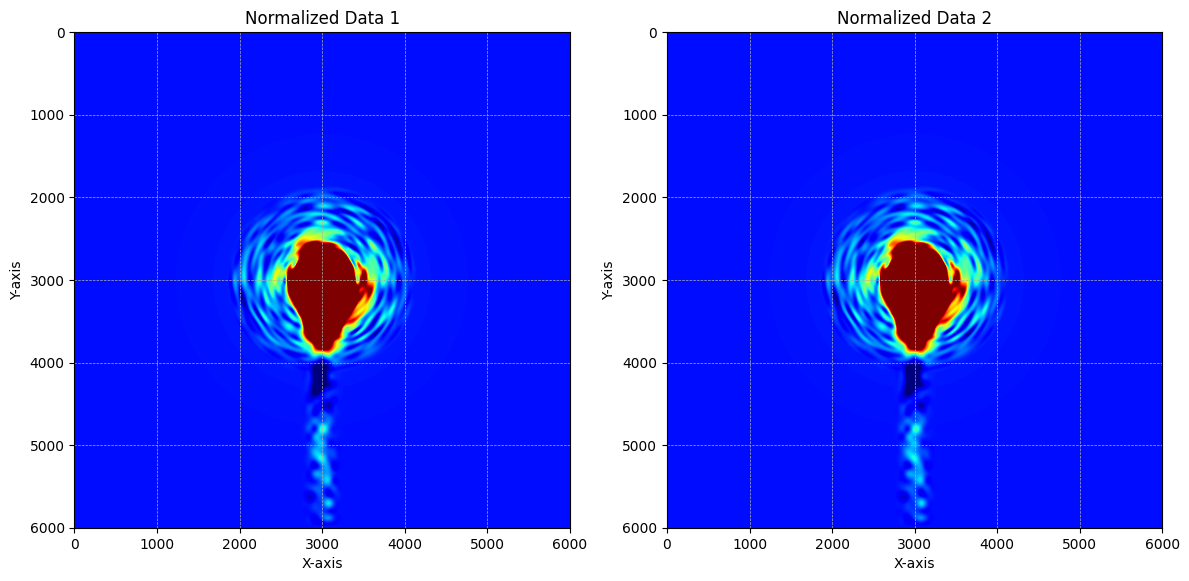

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))  # Create a figure with 3 subplots

normalized_data1 = zscale(z)
normalized_data2 = zscale(znew)

axs[0].imshow(normalized_data1, cmap='jet')
axs[0].set_title('Normalized Data 1')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')


axs[1].imshow(normalized_data2, cmap='jet')
axs[1].set_title('Normalized Data 2')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')

plt.tight_layout()  

plt.show()
